In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [ ]:
cols = ["flen", "fwid", "fsize", "fconc", "fconc1", "fasym", "fm3long", "fm3trans", "falpha", "fdist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()

,flen,fwid,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

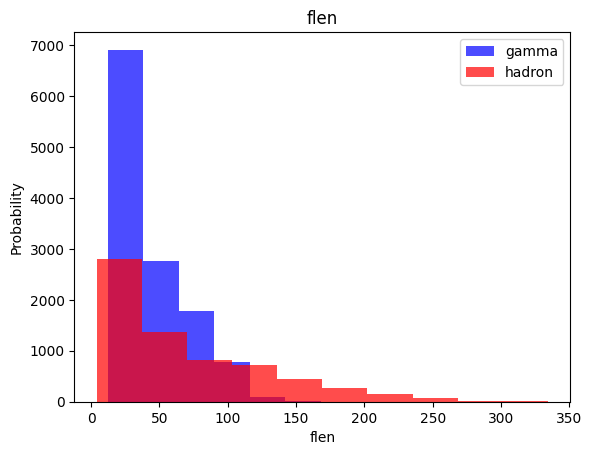

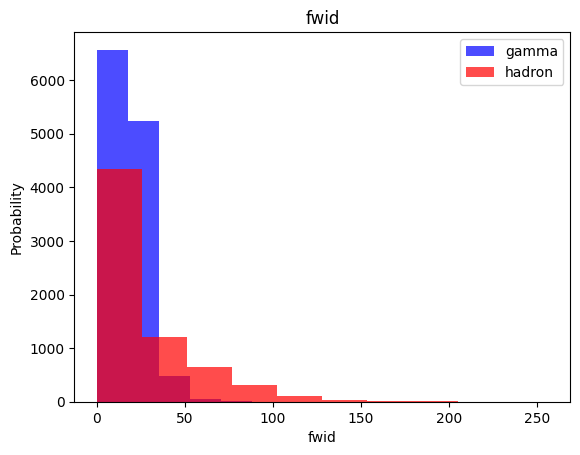

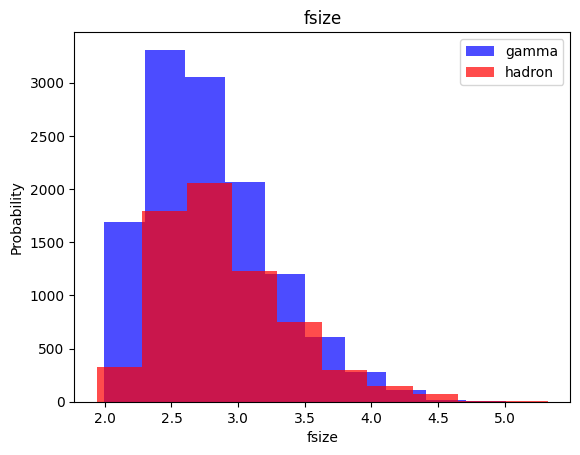

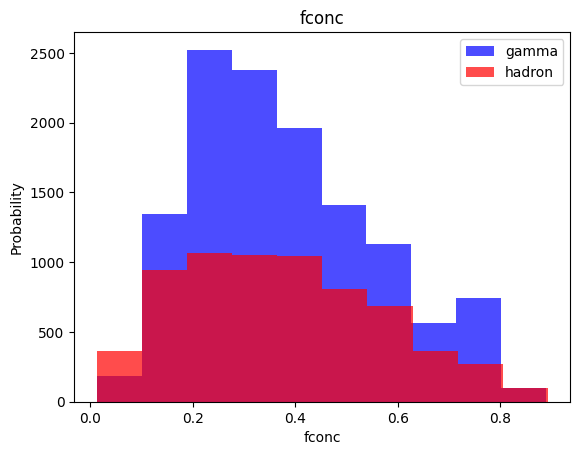

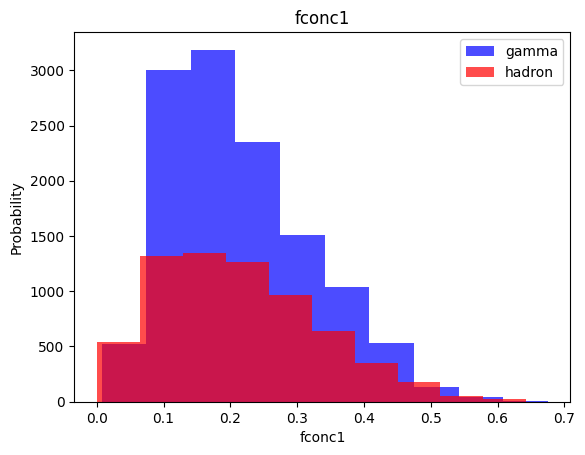

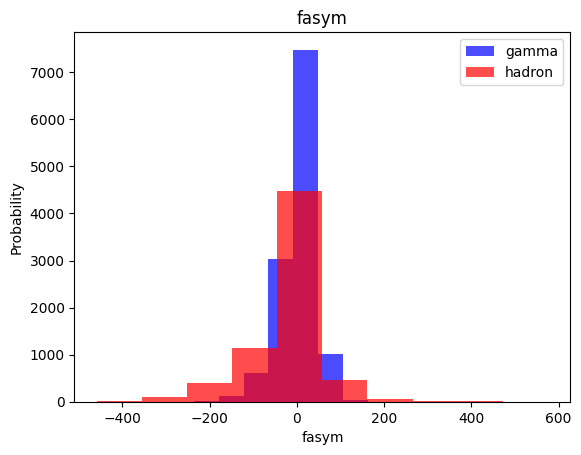

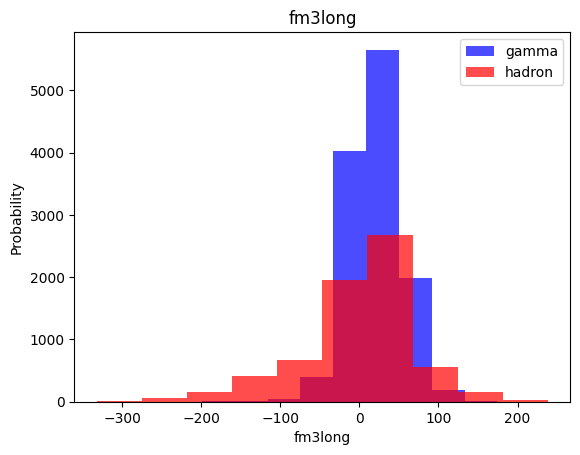

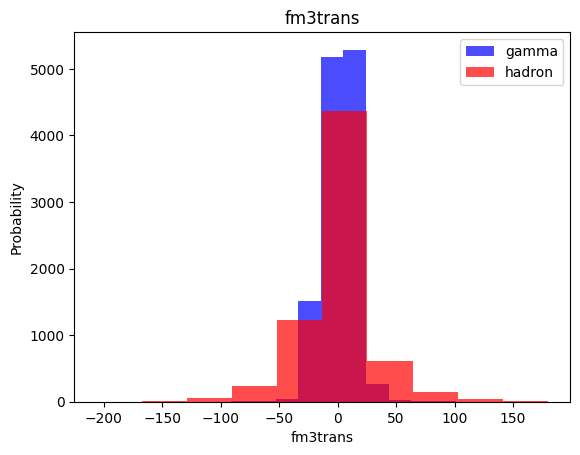

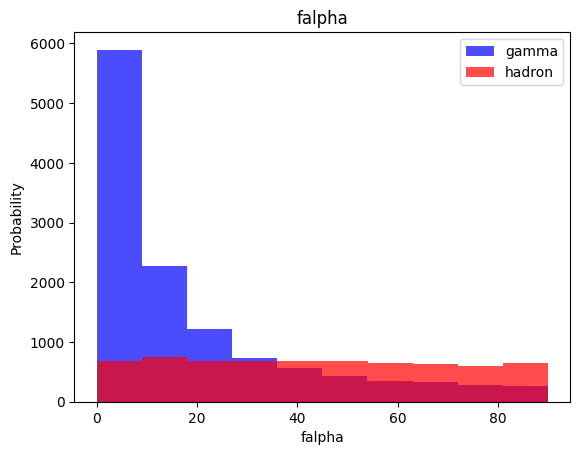

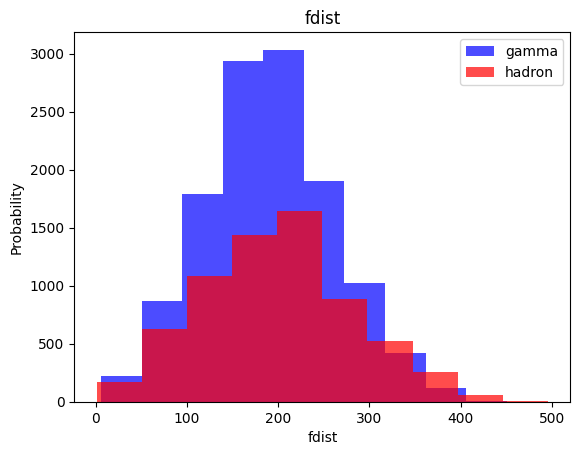

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color = "blue", label="gamma", alpha = 0.7)
  plt.hist(df[df["class"] == 0][label], color = "red", label="hadron", alpha = 0.7)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [ ]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_ds(df, oversample = False):
  X = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_ds(train, oversample = True)
valid, X_valid, y_valid = scale_ds(valid, oversample = False)
test, X_test, y_test = scale_ds(test, oversample = False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1284
           1       0.87      0.87      0.87      2520

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nbm = GaussianNB()
nbm = nbm.fit(X_train, y_train)

In [ ]:
y_pred = nbm.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52      1350
           1       0.74      0.91      0.82      2454

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



In [ ]:
from sklearn.svm import SVC

In [ ]:
svmm = SVC()
svmm = svmm.fit(X_train, y_train)

In [ ]:
y_pred = svmm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1350
           1       0.89      0.89      0.89      2454

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1284
           1       0.86      0.84      0.85      2520

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



[Text(0.49445969305861465, 0.9814814814814815, 'x[8] <= -0.307\ngini = 0.5\nsamples = 14772\nvalue = [7386, 7386]'),
 Text(0.2613658610726453, 0.9444444444444444, 'x[0] <= 1.331\ngini = 0.374\nsamples = 6718\nvalue = [1672, 5046]'),
 Text(0.13928337498445215, 0.9074074074074074, 'x[4] <= -0.227\ngini = 0.322\nsamples = 6207\nvalue = [1254, 4953]'),
 Text(0.0289186908171474, 0.8703703703703703, 'x[6] <= -1.279\ngini = 0.203\nsamples = 3399\nvalue = [390, 3009]'),
 Text(0.0033082629035176138, 0.8333333333333334, 'x[1] <= 0.855\ngini = 0.438\nsamples = 114\nvalue = [77, 37]'),
 Text(0.0016541314517588069, 0.7962962962962963, 'x[8] <= -0.897\ngini = 0.486\nsamples = 60\nvalue = [25, 35]'),
 Text(0.0008270657258794034, 0.7592592592592593, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.0024811971776382102, 0.7592592592592593, 'x[2] <= -0.089\ngini = 0.469\nsamples = 40\nvalue = [25, 15]'),
 Text(0.0016541314517588069, 0.7222222222222222, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Te

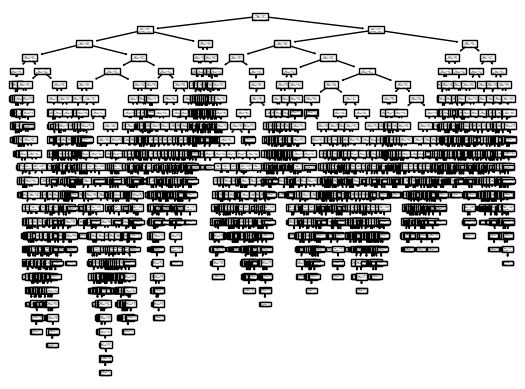

In [ ]:
tree.plot_tree(clf)

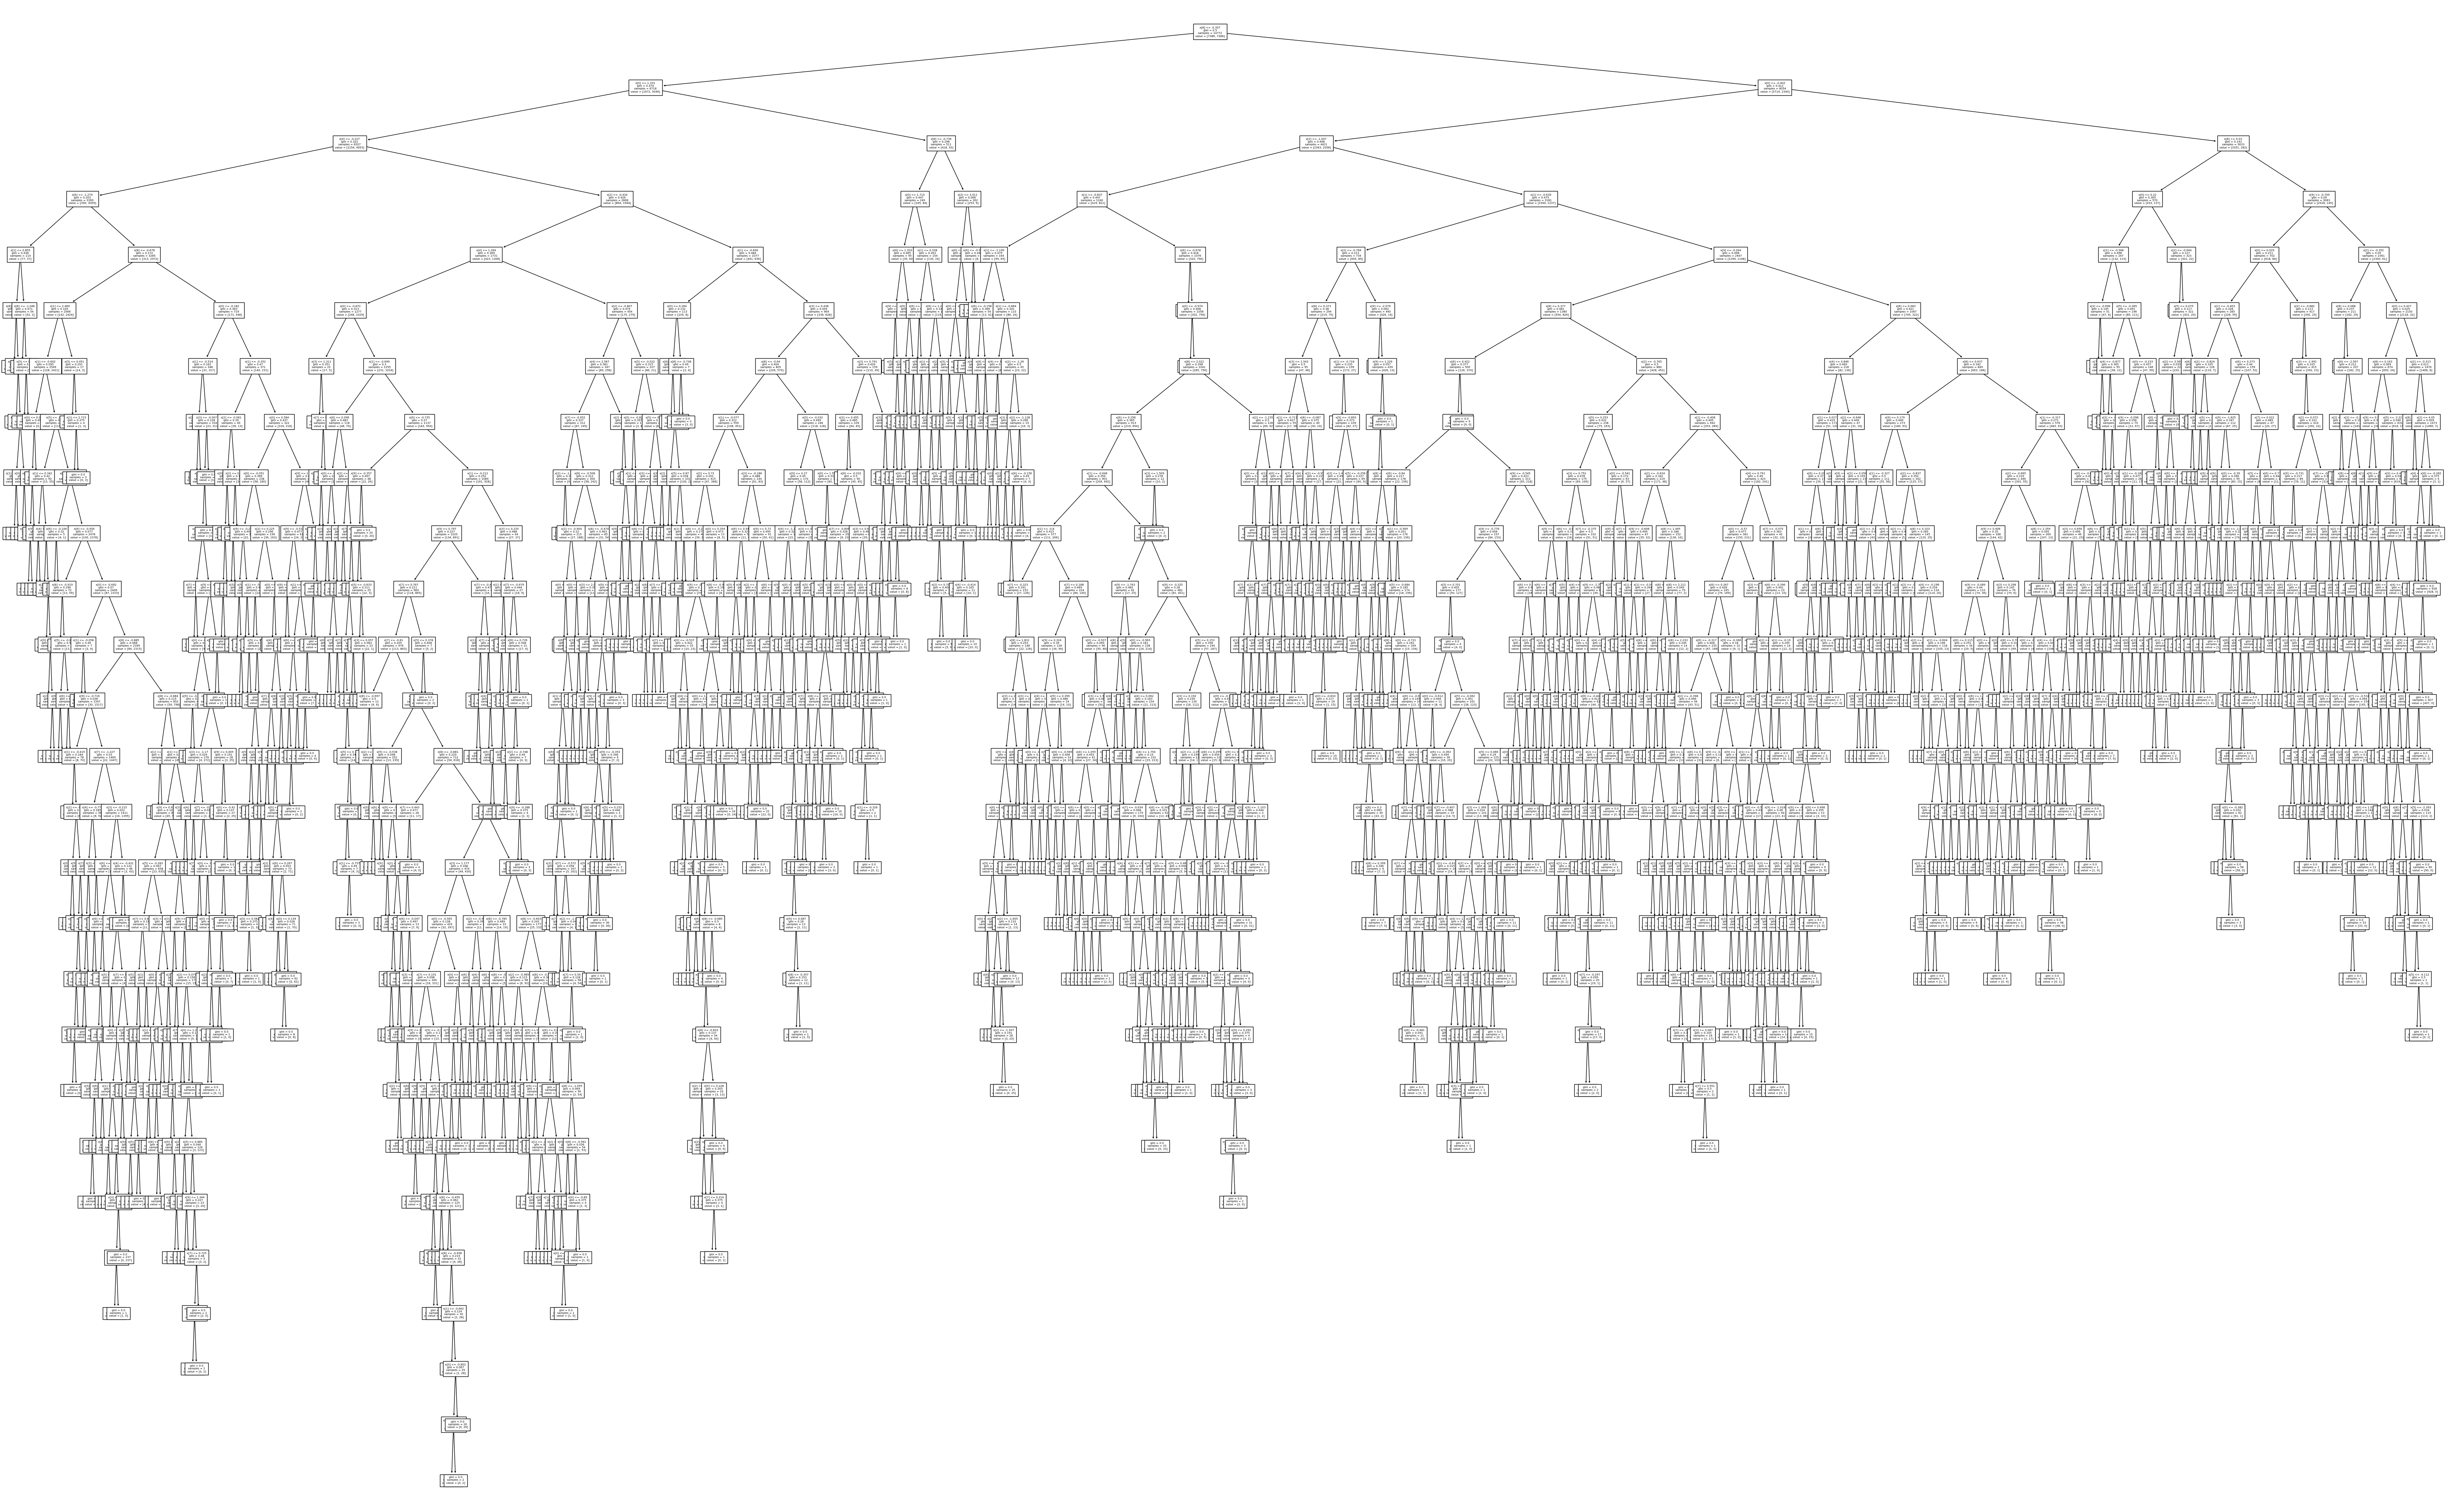

In [ ]:
plt.figure(figsize=(80,50))
tree.plot_tree(clf, fontsize=5)
plt.show()

In [ ]:
from sklearn.cluster import KMeans